# Application of Machine learning and Big Data in Enhancing Road Safety by Predicting Accidents.

                            

                            Supervisor: Dr. Evans Omondi

                            Student: Dennis Mwenda

                            Reg: 148988

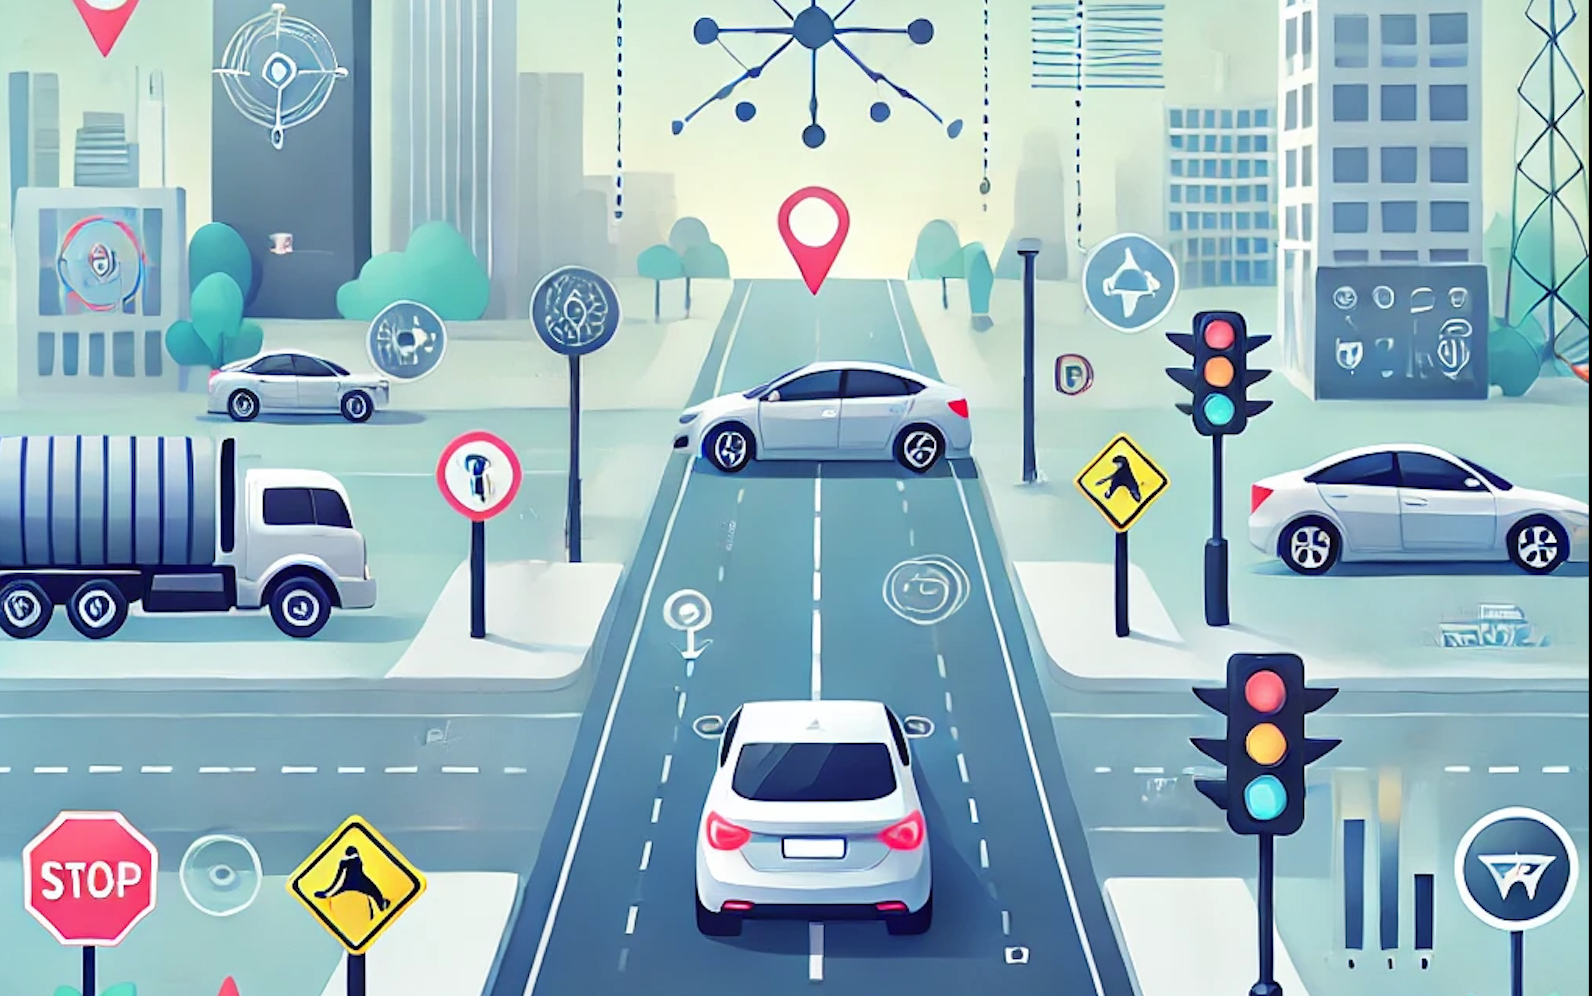



# Table of Contents 


1. Description of data
2. Problem Statement
3. Research questions

4. Data Preprocessing
5. Exploratory Data Analysis
6. Choosing Appropriate Models
7. Model Training
8. Model Evaluation
9. Model Optimization / Model tunning
10. Model Deployment
11. Monitoring the Model 

# 1. Description of data

The datset to be used for this research is obtained from www.kaggle.com, which is a well renowned site hosting Machine Learning and AI datasets. 

Below is an illustration of the structure, composition and explanation of the datset features. 

    

    1. Index: Identifier or unique reference for each accident.
    
    2. Accident_Severity: Categorization of the severity of the accident (e.g., serious, slight).
    
    3. Accident Date: Date when the accident happened.
    
    4. Latitude & Longitude: Geographical coordinates of the accident location.
    
    5. Light_Conditions: Conditions of lighting when the accident happened (e.g., Daylight, Night with street   lights, Night without lights).
    
    6. District Area: Specific district or region where the accident occurred.
    
    7. Number_of_Casualties: The number of people injured or killed in the accident.
    
    8. Number_of_Vehicles: The number of vehicles involved in the accident.
    
    9. Road_Surface_Conditions: The condition of the road when the accident occurred (e.g., Dry, Wet, Icy).
    
    10. Road_Type: Type of the road where the accident happened (e.g., Highway, Residential, Main road).
    
    11. Urban_or_Rural_Area: Categorization of the area (e.g., Urban, Rural).
    
    12. Weather_Conditions: The weather conditions during the time of the accident (e.g., Clear, Rainy, Foggy).
    
    13. Vehicle_Type: Type of the main vehicle involved in the accident (e.g., Car, Truck, Motorcycle).


# 2. Statement of the Problem

Road safety is still a major concern because more and more accidents are having a big influence on society and the economy. 

Efforts to proactively improve road safety are hampered by the absence of efficient predictive measures to foresee and prevent accidents. 

Creating a reliable machine learning model that both predicts and lessens the likelihood of accidents is the difficult part. 

The public, law enforcement, and transportation authorities are among the stakeholders who urgently want a focused solution that tackles the unique dynamics of accident-prone locations and significantly lowers the number of traffic accidents. 

The absence of efficient predictive methods to foresee and avoid traffic accidents is the issue being addressed. In order to significantly lower the number of traffic accidents, the emphasis is on creating a machine learning model that can forecast accidents with accuracy.

# 3. Research Objectives:

1. To develop and apply machine learning models within the project time-frame that
predict accident severity using historical data and quantifiable metrics


2. To apply an interactive geospatial tool that combines spatial analysis and machine
learning for effective investigation of accident trends by interested parties.


3. To analyze temporal trends in accidents, considering day, time, and seasons, to enhance
understanding of road safety dynamics within the project duration.

In [1]:
# Required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
import pylab as pl
import scipy.optimize as opt
from sklearn.model_selection import train_test_split

# Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Balancing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



# IMPORTING PACKAGES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline

# DATA SPLIT

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV



# GEOGRAPHICAL
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame, HTML
import geopandas as gpd
from shapely.geometry import Point


# MODELS
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 


# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# EVALUATION

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [47]:
df = pd.read_csv(r"C:\Users\denny\OneDrive\Desktop\python\Accident_Severity\new_accident.csv")
df.head()

Index Accident_Severity Accident Date   Latitude  \
0  200701BS64157           Serious    05-06-2019  51.506187   
1  200701BS65737           Serious    02-07-2019  51.495029   
2  200701BS66127           Serious    26-08-2019  51.517715   
3  200701BS66128           Serious    16-08-2019  51.495478   
4  200701BS66837            Slight    03-09-2019  51.488576   

              Light_Conditions           District Area  Longitude  \
0        Darkness - lights lit  Kensington and Chelsea  -0.209082   
1                     Daylight  Kensington and Chelsea  -0.173647   
2  Darkness - lighting unknown  Kensington and Chelsea  -0.210215   
3                     Daylight  Kensington and Chelsea  -0.202731   
4        Darkness - lights lit  Kensington and Chelsea  -0.192487   

   Number_of_Casualties  Number_of_Vehicles Road_Surface_Conditions  ...  \
0                     1                   2                     Dry  ...   
1                     1                   2             Wet or damp  ...   
2                     1                   3                     Dry  ...   
3                     1                   4                     Dry  ...   
4                     1                   2                     Dry  ...   

  Urban_or_Rural_Area     Weather_Conditions  \
0               Urban     Fine no high winds   
1               Urban  Raining no high winds   
2               Urban     Fine no high winds   
3               Urban     Fine no high winds   
4               Urban     Fine no high winds   

                           Vehicle_Type   light_cond_updated  \
0                                   Car   Darkness_lights_on   
1                                   Car             Daylight   
2                 Taxi/Private hire car  Darkness_lights_off   
3  Bus or coach (17 or more pass seats)             Daylight   
4                         Other vehicle   Darkness_lights_on   

  road_surface_updated   road_type_updated weather_conditions_updated  \
0                  Dry  Single carriageway                      Sunny   
1            Wet/flood  Single carriageway                      Rainy   
2                  Dry  Single carriageway                      Sunny   
3                  Dry  Single carriageway                      Sunny   
4                  Dry  Single carriageway                      Sunny   

        vehicle_type_updated urban_or_rural_updated District Area updated  
0             Light_vehicles                  Urban                London  
1             Light_vehicles                  Urban                London  
2             Light_vehicles                  Urban                London  
3  Heavy_commercial_vehicles                  Urban                London  
4         Motorbikes/bicycle                  Urban                London  

[5 rows x 21 columns]

In [48]:
# Checking the Shape
df.shape

(660679, 21)

In [49]:
# List of columns to keep
columns_to_keep = [
    'Accident_Severity',
    'Accident Date',
    'Latitude',
    'Longitude',
    'District Area',
    'Number_of_Casualties',
    'Number_of_Vehicles',
    'light_cond_updated', 
    'road_surface_updated', 
    'road_type_updated', 
    'weather_conditions_updated', 
    'vehicle_type_updated', 
    'urban_or_rural_updated', 
    'District Area updated'
]

# Keep the specified columns and drop the rest
df = df[columns_to_keep]

# Display the resulting dataframe
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Severity           660679 non-null  object 
 1   Accident Date               660679 non-null  object 
 2   Latitude                    660679 non-null  float64
 3   Longitude                   660679 non-null  float64
 4   District Area               660679 non-null  object 
 5   Number_of_Casualties        660679 non-null  int64  
 6   Number_of_Vehicles          660679 non-null  int64  
 7   light_cond_updated          660679 non-null  object 
 8   road_surface_updated        660679 non-null  object 
 9   road_type_updated           660679 non-null  object 
 10  weather_conditions_updated  660679 non-null  object 
 11  vehicle_type_updated        660679 non-null  object 
 12  urban_or_rural_updated      660679 non-null  object 
 13  District Area 

In [50]:
df.head()

Accident_Severity Accident Date   Latitude  Longitude  \
0           Serious    05-06-2019  51.506187  -0.209082   
1           Serious    02-07-2019  51.495029  -0.173647   
2           Serious    26-08-2019  51.517715  -0.210215   
3           Serious    16-08-2019  51.495478  -0.202731   
4            Slight    03-09-2019  51.488576  -0.192487   

            District Area  Number_of_Casualties  Number_of_Vehicles  \
0  Kensington and Chelsea                     1                   2   
1  Kensington and Chelsea                     1                   2   
2  Kensington and Chelsea                     1                   3   
3  Kensington and Chelsea                     1                   4   
4  Kensington and Chelsea                     1                   2   

    light_cond_updated road_surface_updated   road_type_updated  \
0   Darkness_lights_on                  Dry  Single carriageway   
1             Daylight            Wet/flood  Single carriageway   
2  Darkness_lights_off                  Dry  Single carriageway   
3             Daylight                  Dry  Single carriageway   
4   Darkness_lights_on                  Dry  Single carriageway   

  weather_conditions_updated       vehicle_type_updated  \
0                      Sunny             Light_vehicles   
1                      Rainy             Light_vehicles   
2                      Sunny             Light_vehicles   
3                      Sunny  Heavy_commercial_vehicles   
4                      Sunny         Motorbikes/bicycle   

  urban_or_rural_updated District Area updated  
0                  Urban                London  
1                  Urban                London  
2                  Urban                London  
3                  Urban                London  
4                  Urban                London

In [51]:
df['District Area updated'].value_counts()

District Area updated
London           216561
South West        70288
North West        65875
Yorks/Humber      64792
South East        56825
West Midlands     49368
Scotland          36163
Wales             30099
Anglia            27029
East Midlands     25464
North East        18215
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

## 1. Distribution of Accident_Severity

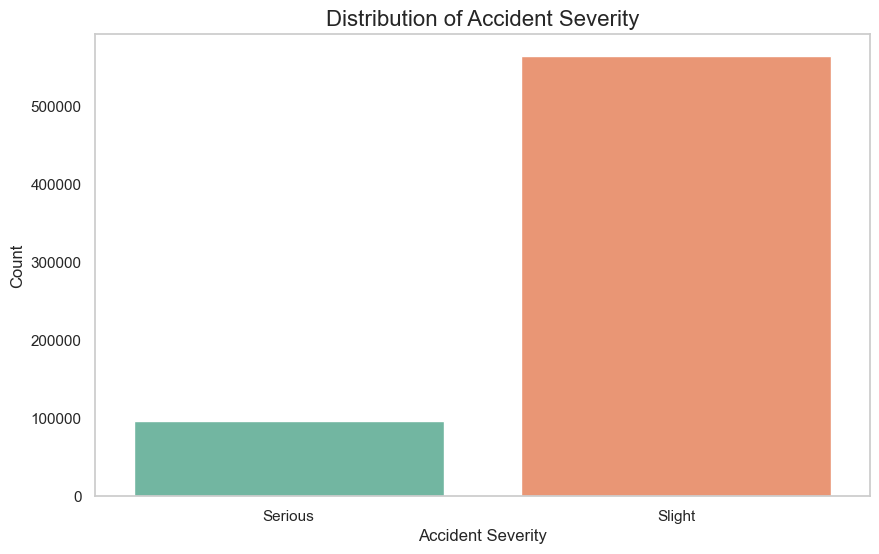

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for high-quality visuals
sns.set(style="whitegrid", palette="muted")

# Plot Accident Severity distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Accident_Severity', palette="Set2")

# Remove gridlines for a cleaner look
plt.grid(False)
plt.title('Distribution of Accident Severity', fontsize=16)
plt.xlabel('Accident Severity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


## 2. Trend of Accidents Over Time (Accident Date)

In [ ]:
fghjkl

## 3. Scatter Plot for Location of Accidents (Latitude and Longitude)

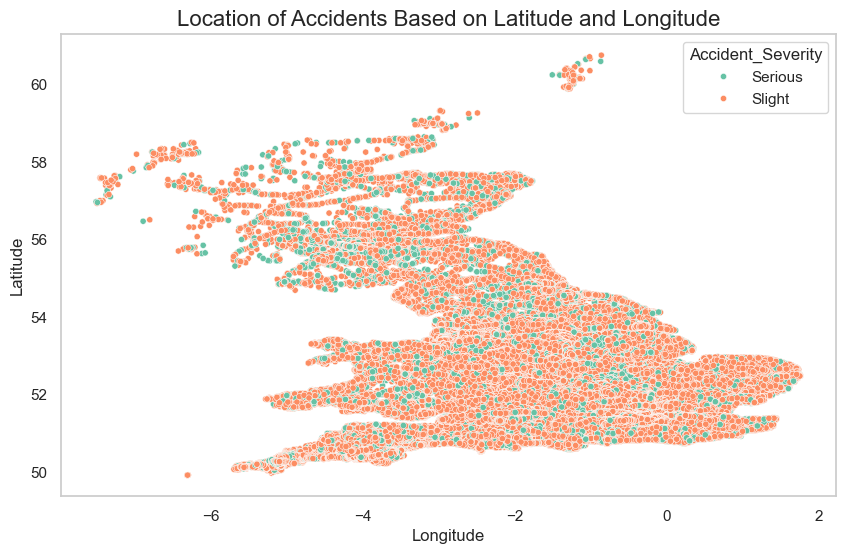

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Accident_Severity', data=df, palette='Set2', s=20)

# Remove gridlines for a cleaner look
plt.grid(False)
plt.title('Location of Accidents Based on Latitude and Longitude', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()


## 4. Distribution of Casualties (Number_of_Casualties)

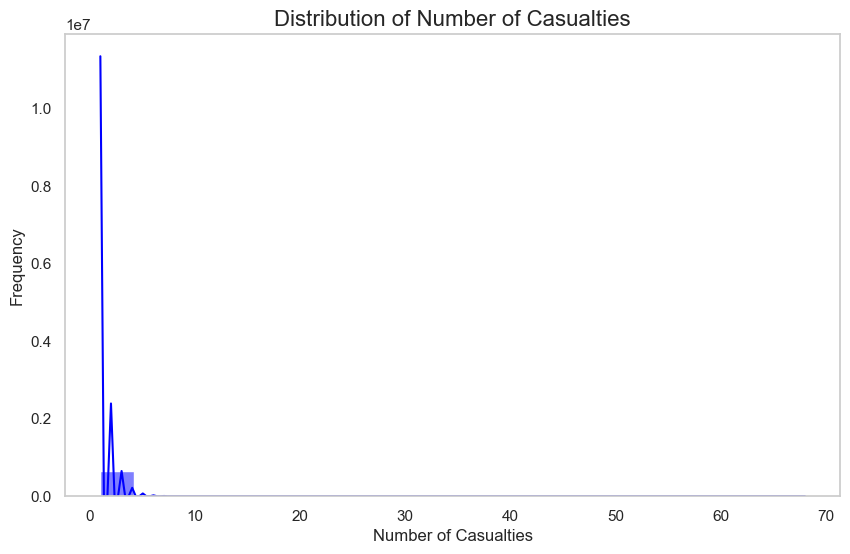

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Number_of_Casualties'], kde=True, color='blue')

# Remove gridlines for a cleaner look
plt.grid(False)
plt.title('Distribution of Number of Casualties', fontsize=16)
plt.xlabel('Number of Casualties', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


## 5. Breakdown by Light Condition (light_cond_updated)

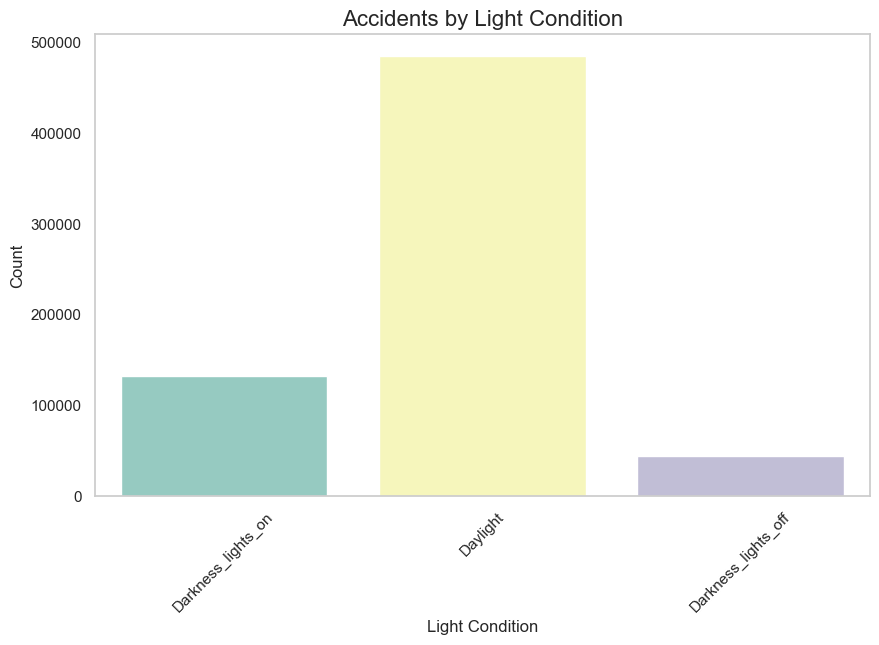

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='light_cond_updated', palette="Set3")

# Remove gridlines for a cleaner look
plt.grid(False)
plt.title('Accidents by Light Condition', fontsize=16)
plt.xlabel('Light Condition', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


## 6. Road Surface Conditions (road_surface_updated)

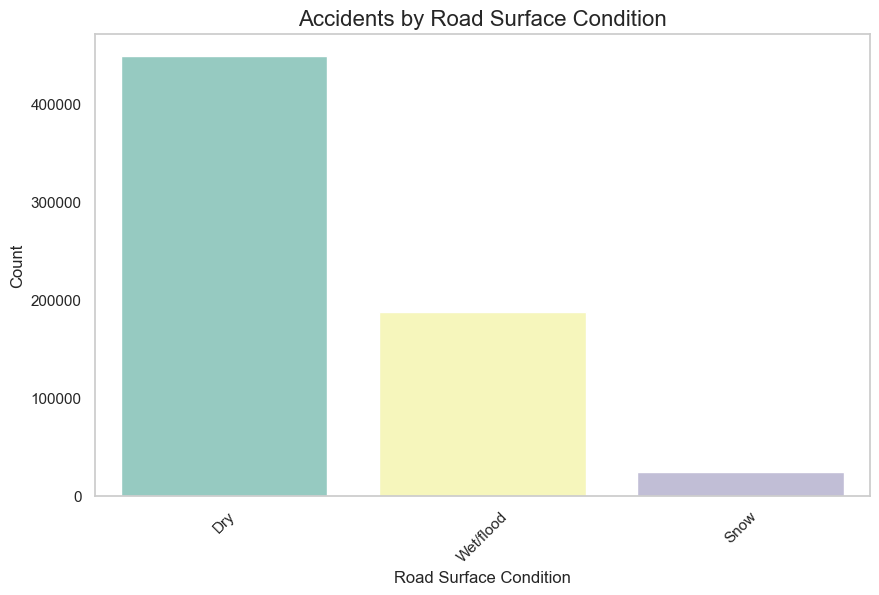

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='road_surface_updated', palette="Set3")

# Remove gridlines for a cleaner look
plt.grid(False)
plt.title('Accidents by Road Surface Condition', fontsize=16)
plt.xlabel('Road Surface Condition', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


## 7. Road Type Distribution (road_type_updated)

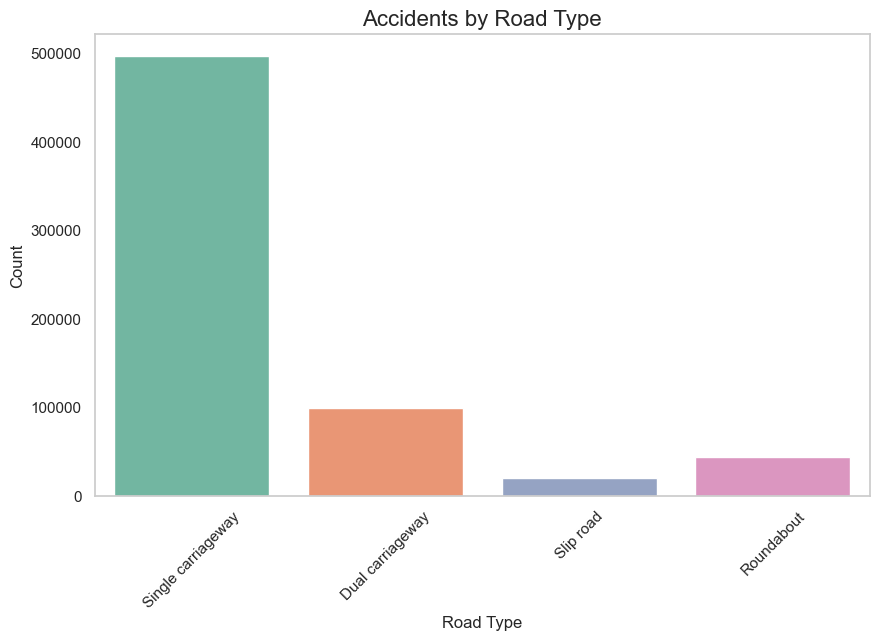

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='road_type_updated', palette="Set2")

# Remove gridlines for a cleaner look
plt.grid(False)
plt.title('Accidents by Road Type', fontsize=16)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


## 8. Weather Conditions (weather_conditions_updated)

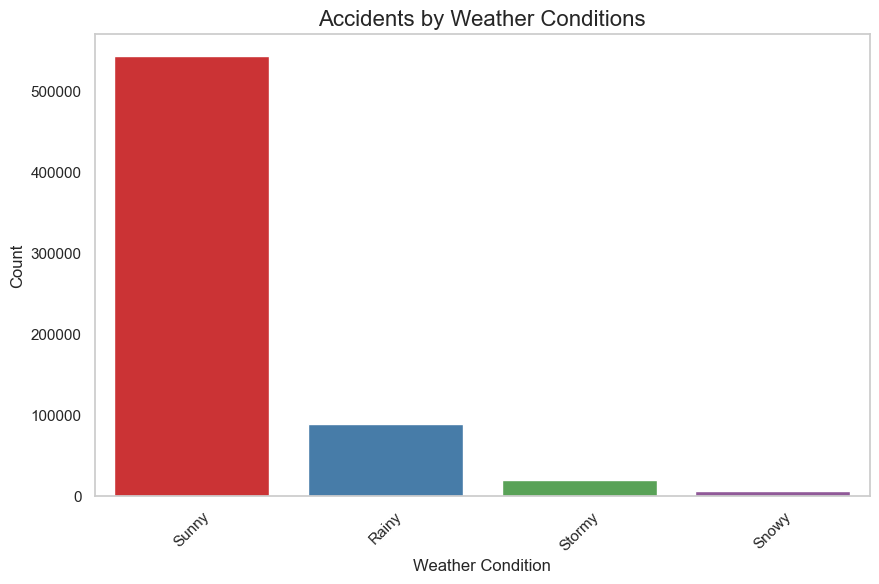

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weather_conditions_updated', palette="Set1")

# Remove gridlines for a cleaner look
plt.grid(False)
plt.title('Accidents by Weather Conditions', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


## 9. Vehicle Type Distribution (vehicle_type_updated)

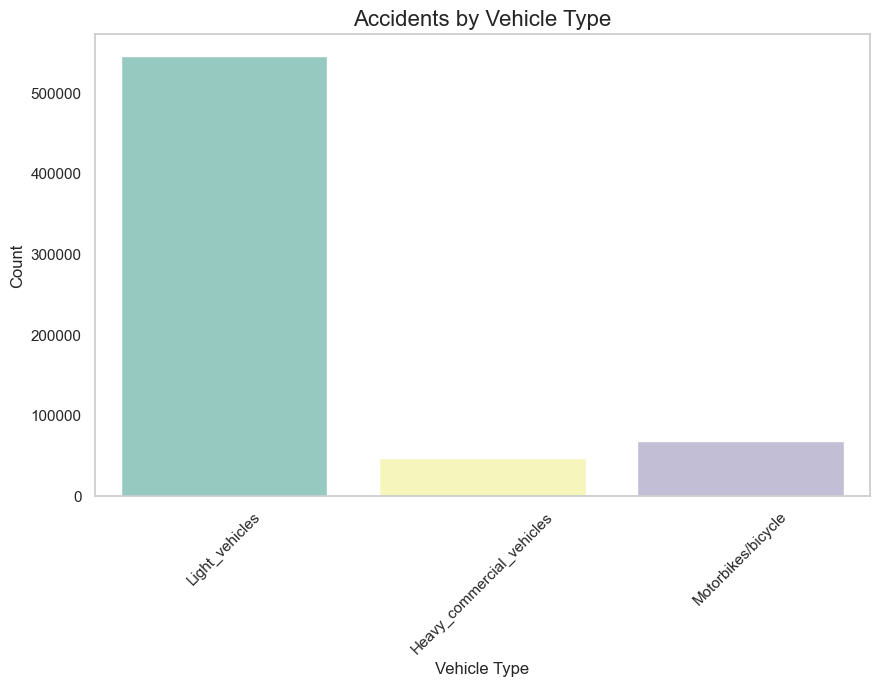

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='vehicle_type_updated', palette="Set3")

# Remove gridlines for a cleaner look
plt.grid(False)
plt.title('Accidents by Vehicle Type', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


## 10. Urban vs Rural Accidents (urban_or_rural_updated)

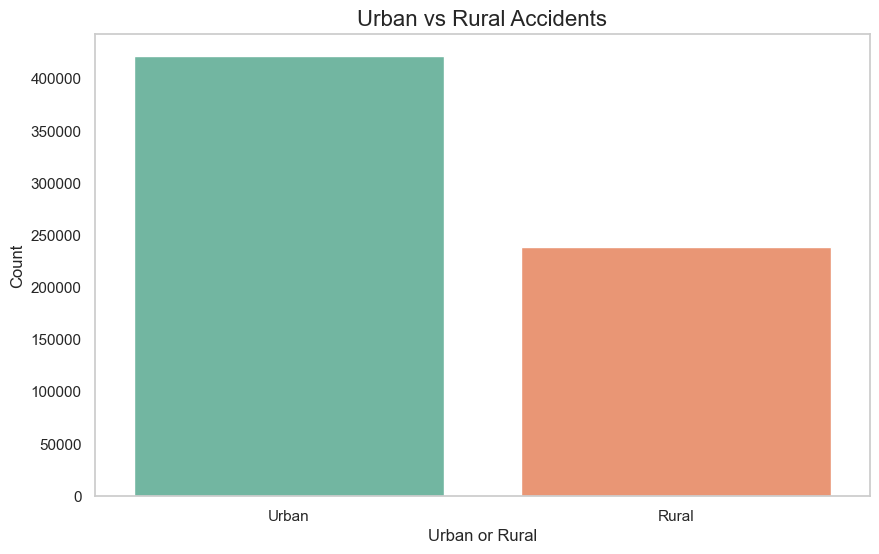

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='urban_or_rural_updated', palette="Set2")

# Remove gridlines for a cleaner look
plt.grid(False)
plt.title('Urban vs Rural Accidents', fontsize=16)
plt.xlabel('Urban or Rural', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


## 1. Descriptive Statistics (Numerical Overview)

Let’s start by summarizing the dataset’s numerical columns (Number_of_Casualties, Number_of_Vehicles, Latitude, Longitude).

In [52]:
# Descriptive statistics for numerical columns
numerical_columns = ['Number_of_Casualties', 'Number_of_Vehicles', 'Latitude', 'Longitude']
df[numerical_columns].describe()


Number_of_Casualties  Number_of_Vehicles       Latitude      Longitude
count         660679.000000       660679.000000  660679.000000  660679.000000
mean               1.357040            1.831255      52.553866      -1.431210
std                0.824847            0.715269       1.406896       1.383302
min                1.000000            1.000000      49.914430      -7.516225
25%                1.000000            1.000000      51.490696      -2.332191
50%                1.000000            2.000000      52.315755      -1.411761
75%                1.000000            2.000000      53.453444      -0.232901
max               68.000000           32.000000      60.757544       1.762010

## 2. Accident Severity vs. Number of Vehicles

A boxplot can reveal insights into the relationship between Accident_Severity and Number_of_Vehicles.

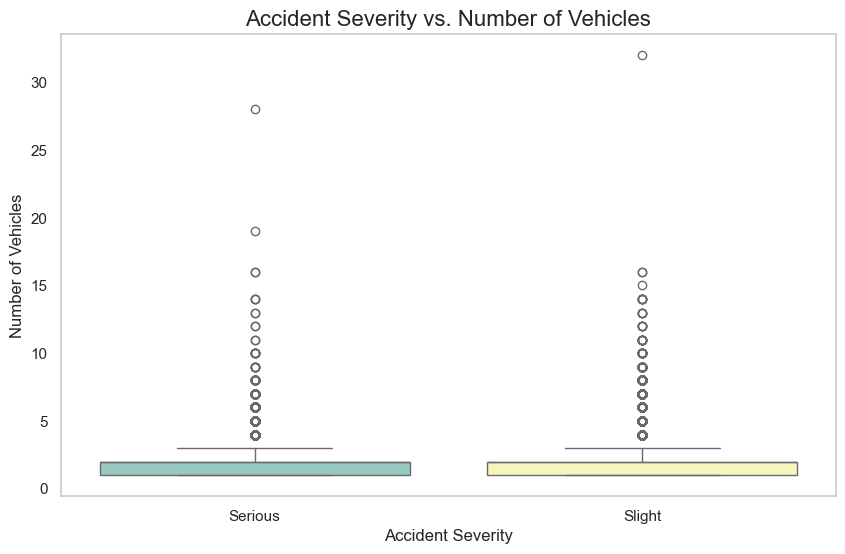

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Accident_Severity', y='Number_of_Vehicles', data=df, palette='Set3')

# Remove gridlines for a cleaner look
plt.grid(False)
plt.title('Accident Severity vs. Number of Vehicles', fontsize=16)
plt.xlabel('Accident Severity', fontsize=12)
plt.ylabel('Number of Vehicles', fontsize=12)
plt.show()


## 4. Spatial Analysis: Accident Density by Location

We'll map the density of accidents using Latitude and Longitude to see hotspots of accidents. For a more polished look, we’ll use kdeplot (kernel density estimation).

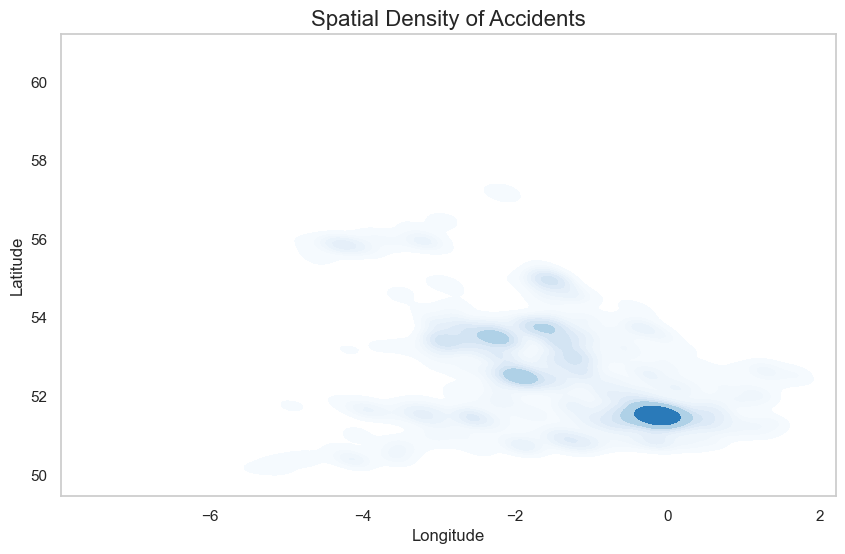

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='Longitude', y='Latitude', data=df, cmap='Blues', fill=True, thresh=0.05)

# Remove gridlines for a cleaner look
plt.grid(False)
plt.title('Spatial Density of Accidents', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()


## 5. Top 10 Districts by Number of Accidents



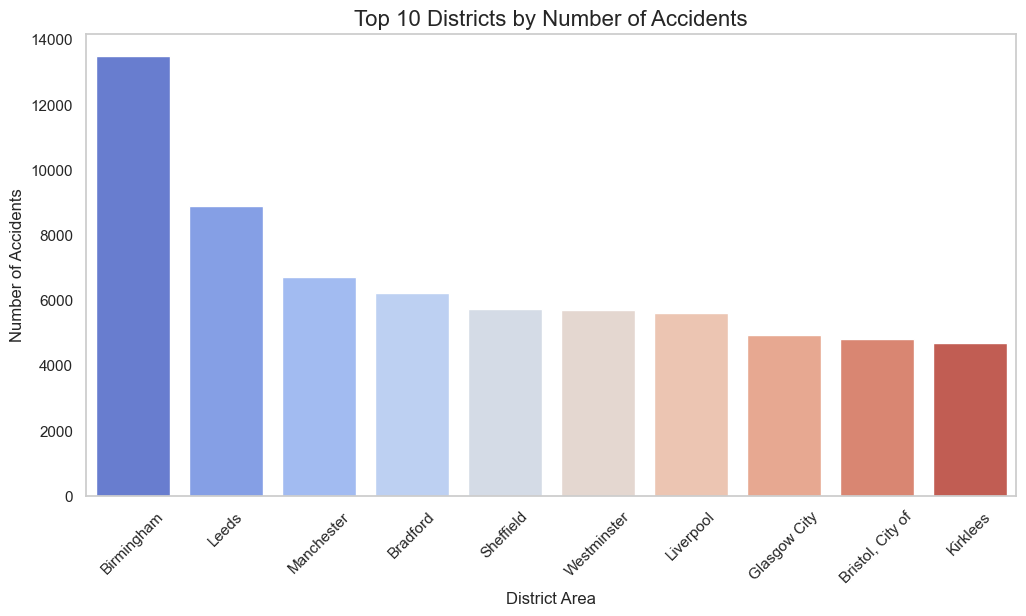

In [19]:
plt.figure(figsize=(12, 6))
district_counts = df['District Area'].value_counts().head(10)  # Limit to top 10 districts
sns.barplot(x=district_counts.index, y=district_counts.values, palette='coolwarm')

# Remove gridlines for a cleaner look
plt.grid(False)
plt.title('Top 10 Districts by Number of Accidents', fontsize=16)
plt.xlabel('District Area', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.show()



## 6. Top 10 Districts: Accident Severity



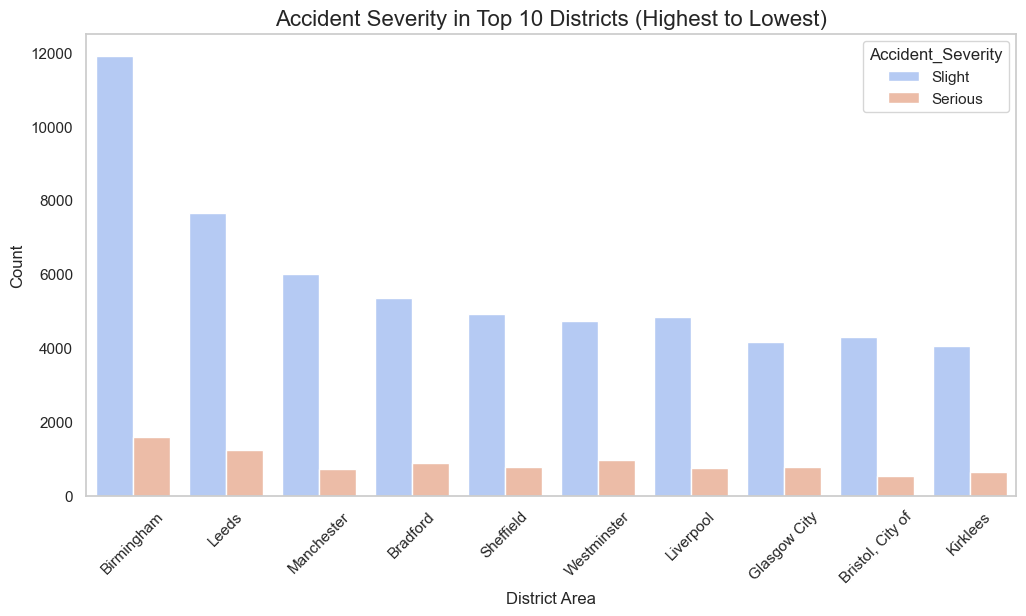

In [20]:
# Filter dataframe to include only the top 10 districts by number of accidents
top_10_districts = df['District Area'].value_counts().head(10)

# Reorder 'District Area' column in the filtered dataframe based on accident count
filtered_df = df[df['District Area'].isin(top_10_districts.index)]
filtered_df['District Area'] = pd.Categorical(filtered_df['District Area'], 
                                              categories=top_10_districts.index, 
                                              ordered=True)

# Plot the accident severity distribution in top 10 districts, sorted by accident count
plt.figure(figsize=(12, 6))
sns.countplot(x='District Area', hue='Accident_Severity', data=filtered_df, 
              palette='coolwarm')  # Good color combination

# Remove gridlines for a cleaner look
plt.grid(False)
plt.title('Accident Severity in Top 10 Districts (Highest to Lowest)', fontsize=16)
plt.xlabel('District Area', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()



## Date and Time Features


In [53]:
# Convert 'Accident Date' to datetime format with the correct format and dayfirst=True
df['Accident Date'] = pd.to_datetime(df['Accident Date'], format='%d-%m-%Y', dayfirst=True)

# Extract temporal components
# Extract the actual day names (e.g., Monday, Tuesday)
df['DayOfWeek'] = df['Accident Date'].dt.day_name()

# Check if the day is a weekend (Saturday or Sunday)
df['IsWeekend'] = df['Accident Date'].dt.weekday >= 5

# Extract season based on the month (1: Winter, 2: Spring, 3: Summer, 4: Fall)
df['Season'] = df['Accident Date'].dt.month % 12 // 3 + 1

# Display the DataFrame with extracted features
df[['Accident Date', 'DayOfWeek', 'IsWeekend', 'Season']].head()


Accident Date  DayOfWeek  IsWeekend  Season
0    2019-06-05  Wednesday      False       3
1    2019-07-02    Tuesday      False       3
2    2019-08-26     Monday      False       3
3    2019-08-16     Friday      False       3
4    2019-09-03    Tuesday      False       4

## Daily Accident Trend Over Time (Time Series Plot)

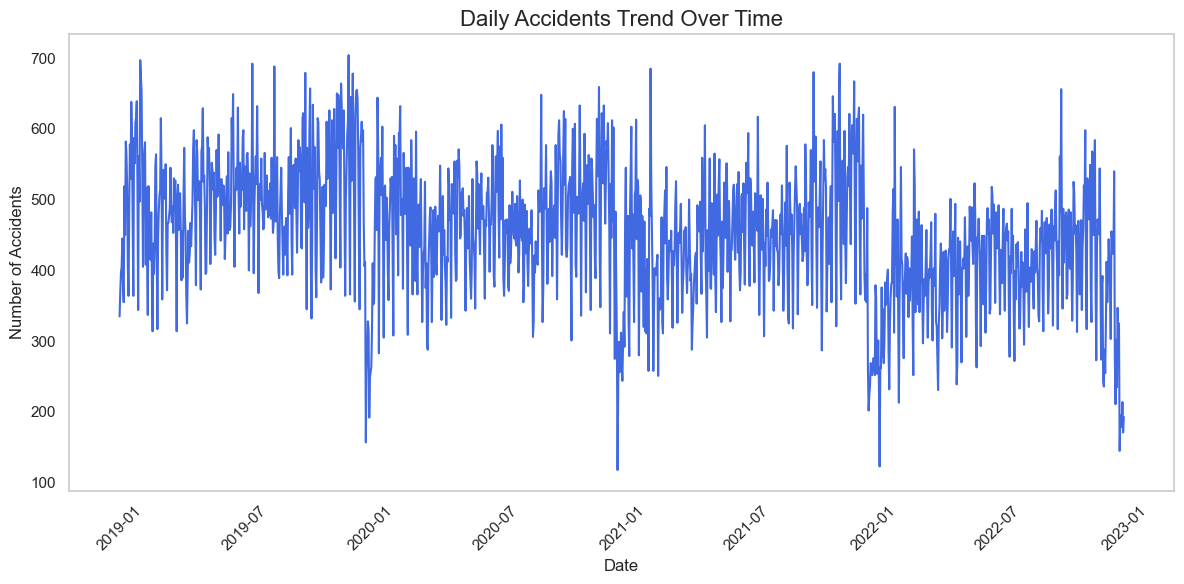

In [54]:
plt.figure(figsize=(12, 6))

# Group by day to get the total number of accidents per day
daily_accidents = df.groupby(df['Accident Date'].dt.date).size()

# Plotting the daily accident count as a time series
sns.lineplot(x=daily_accidents.index, y=daily_accidents.values, color='royalblue')

# Customize plot for better aesthetics
plt.title('Daily Accidents Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.grid(False)  # Remove gridlines
plt.xticks(rotation=45)
plt.tight_layout()  # To prevent label overlap
plt.show()


## Accident Count by Day of the Week

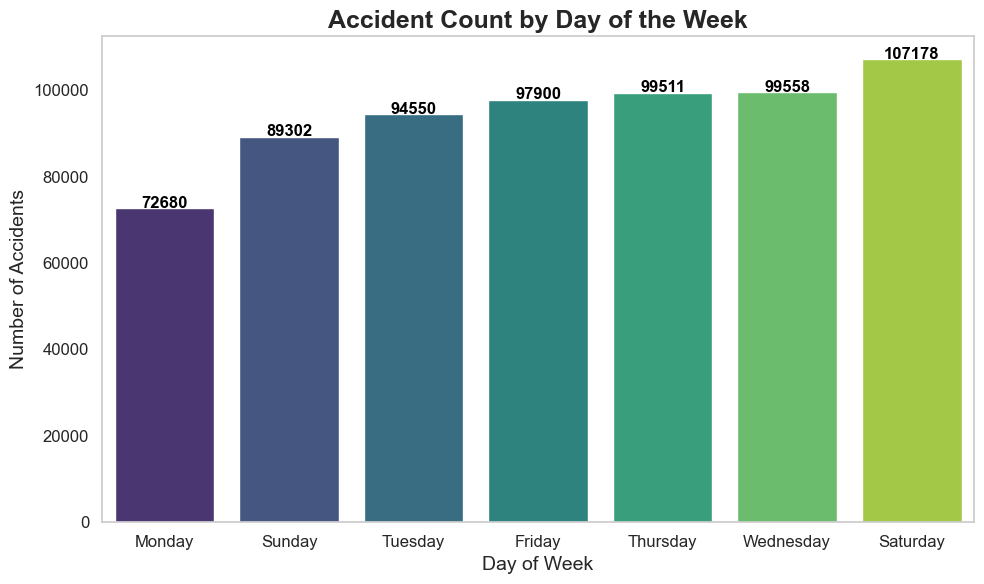

In [55]:
plt.figure(figsize=(10, 6))

# Group by day of the week and sort by the number of accidents in descending order
day_of_week_accidents = df['DayOfWeek'].value_counts().sort_values(ascending=True)

# Bar plot for accident counts per day of the week in descending order
sns.barplot(x=day_of_week_accidents.index, y=day_of_week_accidents.values, palette='viridis')

# Customize plot for better aesthetics
plt.title('Accident Count by Day of the Week', fontsize=18, fontweight='bold')
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove gridlines for a cleaner look
plt.grid(False)

# Adding value labels on the top of bars for better readability
for i in range(len(day_of_week_accidents)):
    plt.text(i, day_of_week_accidents.values[i] + 50, str(day_of_week_accidents.values[i]), 
             ha='center', fontsize=12, fontweight='bold', color='black')

# Show plot
plt.tight_layout()
plt.show()


## Boxplot: Distribution of Accidents by Day of the Week

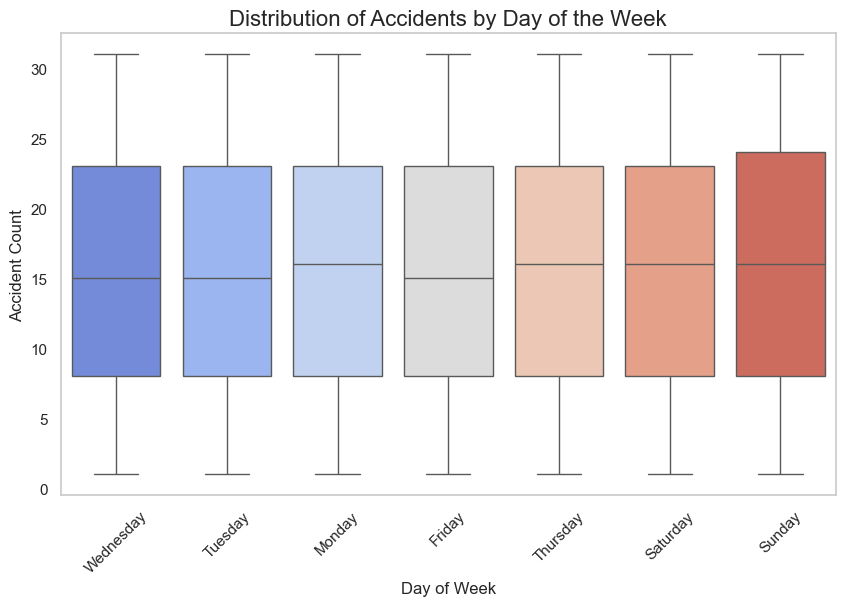

In [56]:
plt.figure(figsize=(10, 6))

# Create boxplot of accidents per day of the week
sns.boxplot(x='DayOfWeek', y=df['Accident Date'].dt.day, data=df, palette='coolwarm')

# Customize plot for better aesthetics
plt.title('Distribution of Accidents by Day of the Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.grid(False)  # Remove gridlines
plt.xticks(rotation=45)
plt.show()


In [57]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Display the first few rows of the GeoDataFrame
gdf.head()


Accident_Severity Accident Date   Latitude  Longitude  \
0           Serious    2019-06-05  51.506187  -0.209082   
1           Serious    2019-07-02  51.495029  -0.173647   
2           Serious    2019-08-26  51.517715  -0.210215   
3           Serious    2019-08-16  51.495478  -0.202731   
4            Slight    2019-09-03  51.488576  -0.192487   

            District Area  Number_of_Casualties  Number_of_Vehicles  \
0  Kensington and Chelsea                     1                   2   
1  Kensington and Chelsea                     1                   2   
2  Kensington and Chelsea                     1                   3   
3  Kensington and Chelsea                     1                   4   
4  Kensington and Chelsea                     1                   2   

    light_cond_updated road_surface_updated   road_type_updated  \
0   Darkness_lights_on                  Dry  Single carriageway   
1             Daylight            Wet/flood  Single carriageway   
2  Darkness_lights_off                  Dry  Single carriageway   
3             Daylight                  Dry  Single carriageway   
4   Darkness_lights_on                  Dry  Single carriageway   

  weather_conditions_updated       vehicle_type_updated  \
0                      Sunny             Light_vehicles   
1                      Rainy             Light_vehicles   
2                      Sunny             Light_vehicles   
3                      Sunny  Heavy_commercial_vehicles   
4                      Sunny         Motorbikes/bicycle   

  urban_or_rural_updated District Area updated  DayOfWeek  IsWeekend  Season  \
0                  Urban                London  Wednesday      False       3   
1                  Urban                London    Tuesday      False       3   
2                  Urban                London     Monday      False       3   
3                  Urban                London     Friday      False       3   
4                  Urban                London    Tuesday      False       4   

                    geometry  
0  POINT (-0.20908 51.50619)  
1  POINT (-0.17365 51.49503)  
2  POINT (-0.21022 51.51772)  
3  POINT (-0.20273 51.49548)  
4  POINT (-0.19249 51.48858)

## Convert the DataFrame to a GeoDataFrame by specifying the geometry

In [58]:
# Convert the DataFrame to a GeoDataFrame by specifying the geometry
gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df['Longitude'], df['Latitude'])
)

# Optionally, set the coordinate reference system (CRS), e.g., WGS84
gdf.set_crs(epsg=4326, inplace=True)  # WGS84 is the common lat/long system


Accident_Severity Accident Date   Latitude  Longitude  \
0                Serious    2019-06-05  51.506187  -0.209082   
1                Serious    2019-07-02  51.495029  -0.173647   
2                Serious    2019-08-26  51.517715  -0.210215   
3                Serious    2019-08-16  51.495478  -0.202731   
4                 Slight    2019-09-03  51.488576  -0.192487   
...                  ...           ...        ...        ...   
660674            Slight    2022-02-18  57.374005  -3.467828   
660675            Slight    2022-02-21  57.232273  -3.809281   
660676            Slight    2022-02-23  57.585044  -3.862727   
660677           Serious    2022-02-23  57.214898  -3.823997   
660678           Serious    2022-02-28  57.575210  -3.895673   

                 District Area  Number_of_Casualties  Number_of_Vehicles  \
0       Kensington and Chelsea                     1                   2   
1       Kensington and Chelsea                     1                   2   
2       Kensington and Chelsea                     1                   3   
3       Kensington and Chelsea                     1                   4   
4       Kensington and Chelsea                     1                   2   
...                        ...                   ...                 ...   
660674                Highland                     2                   1   
660675                Highland                     1                   1   
660676                Highland                     1                   3   
660677                Highland                     1                   2   
660678                Highland                     1                   1   

         light_cond_updated road_surface_updated   road_type_updated  \
0        Darkness_lights_on                  Dry  Single carriageway   
1                  Daylight            Wet/flood  Single carriageway   
2       Darkness_lights_off                  Dry  Single carriageway   
3                  Daylight                  Dry  Single carriageway   
4        Darkness_lights_on                  Dry  Single carriageway   
...                     ...                  ...                 ...   
660674             Daylight                  Dry  Single carriageway   
660675  Darkness_lights_off                 Snow  Single carriageway   
660676             Daylight                 Snow  Single carriageway   
660677  Darkness_lights_off            Wet/flood  Single carriageway   
660678             Daylight            Wet/flood    Dual carriageway   

       weather_conditions_updated       vehicle_type_updated  \
0                           Sunny             Light_vehicles   
1                           Rainy             Light_vehicles   
2                           Sunny             Light_vehicles   
3                           Sunny  Heavy_commercial_vehicles   
4                           Sunny         Motorbikes/bicycle   
...                           ...                        ...   
660674                      Sunny             Light_vehicles   
660675                      Sunny             Light_vehicles   
660676                      Sunny             Light_vehicles   
660677                      Sunny         Motorbikes/bicycle   
660678                      Snowy             Light_vehicles   

       urban_or_rural_updated District Area updated  DayOfWeek  IsWeekend  \
0                       Urban                London  Wednesday      False   
1                       Urban                London    Tuesday      False   
2                       Urban                London     Monday      False   
3                       Urban                London     Friday      False   
4                       Urban                London    Tuesday      False   
...                       ...                   ...        ...        ...   
660674                  Rural              Scotland     Friday      False   
660675                  Rural              Scotland     Monday      False  

### Visualize how accidents are distributed according to different light conditions.

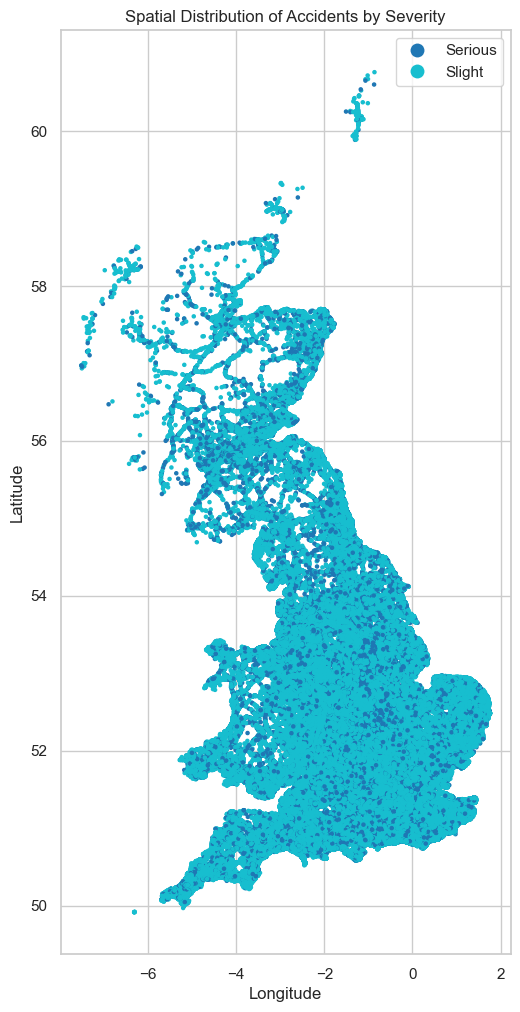

In [27]:
# Plot the spatial data by accident severity
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf.plot(ax=ax, marker='o', column='Accident_Severity', legend=True, markersize=5)
plt.title('Spatial Distribution of Accidents by Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


### Visualize the distribution based on weather conditions.

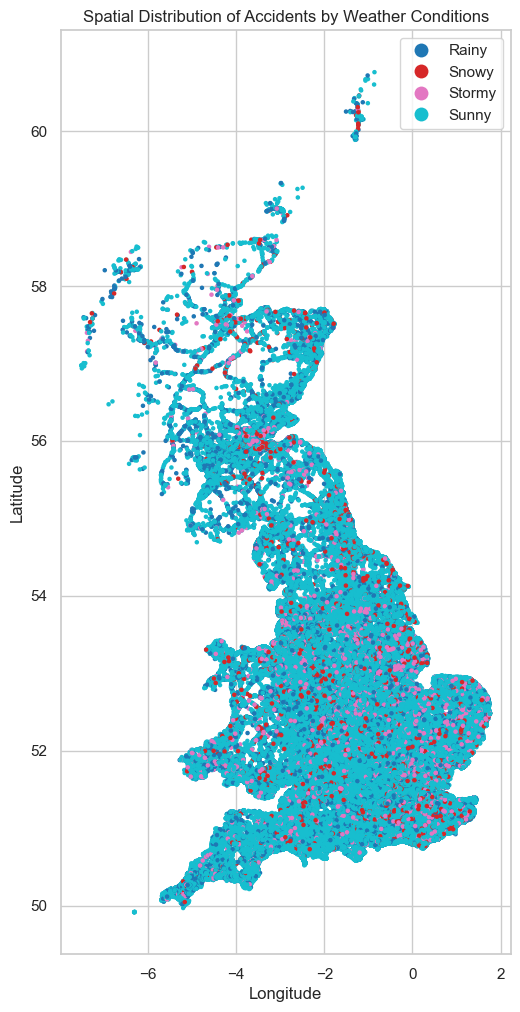

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf.plot(ax=ax, marker='o', column='weather_conditions_updated', legend=True, markersize=5)
plt.title('Spatial Distribution of Accidents by Weather Conditions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


### Visualize how accidents are distributed according to different road surface conditions.

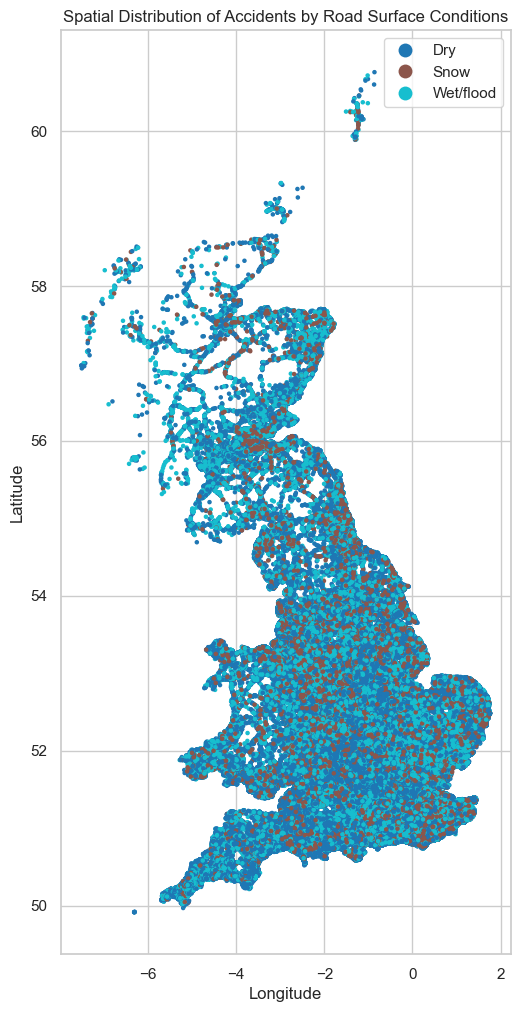

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf.plot(ax=ax, marker='o', column='road_surface_updated', legend=True, markersize=5)
plt.title('Spatial Distribution of Accidents by Road Surface Conditions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Spatial Plot 

<Figure size 2000x1600 with 0 Axes>

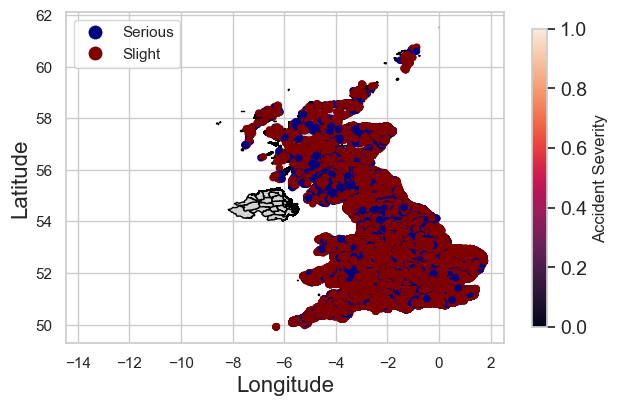

In [30]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load administrative unit data (shapefile)
Accident_Severity = gpd.read_file(r"C:\Users\denny\OneDrive\Desktop\python\Accident_Severity\reaccident_dataset.zip")

# Assuming you have already loaded your updated_df DataFrame

# Create a GeoDataFrame from updated_df
Accident_Severity_gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df['Longitude'],df['Latitude']))

# Plot administrative units
plt.figure(figsize=(20, 16))  # Enlarge the map
Accident_Severity.plot(color='lightgrey', edgecolor='black')  # Customize colors

# Create a scatter plot of accident severity with custom colors
Accident_Severity_gdf.plot(ax=plt.gca(), column='Accident_Severity', legend=True, cmap='jet', markersize=20)

# Add colorbar with custom label and formatting
cbar = plt.colorbar(plt.gca().collections[0], label='Accident Severity', orientation='vertical', shrink=0.7)
cbar.ax.tick_params(labelsize=14)  # Customize colorbar font size

# Customize axis labels and title
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
#plt.title('Accident Severity Distribution', fontsize=20)

plt.tight_layout()  # Adjust layout to prevent overlap

# Save the map as a high-quality image (e.g., PNG format)
plt.savefig('accident_severity_map.png', dpi=300)  # Adjust dpi for high resolution

plt.show()



### Folium plot


In [31]:


# For demonstration, taking a sample size of 5000
df_sample = df.sample(5000)

# Initialize a Folium map centered around the mean latitude and longitude of the dataset
m = folium.Map(location=[df_sample['Latitude'].mean(), df_sample['Longitude'].mean()], zoom_start=12)

# Create a marker cluster to handle a large number of points
marker_cluster = MarkerCluster().add_to(m)

# Define marker colors based on severity
def get_marker_color(severity):
    if severity == 'Serious':
        return 'red'
    elif severity == 'Slight':
        return 'blue'

# Loop through the dataset and add points to the map
for _, row in df_sample.iterrows():
    # Create the popup label with additional fields DayOfWeek and light_cond_updated
    popup_label = f"""
    <b>Accident Severity:</b> {row['Accident_Severity']}<br>
    <b>Casualties:</b> {row['Number_of_Casualties']}<br>
    <b>Road:</b> {row['road_type_updated']}<br>
    <b>Light Condition:</b> {row['light_cond_updated']}<br>
    <b>Day of Week:</b> {row['DayOfWeek']}<br>
    """
    
    # Add a marker for each accident point
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_label, max_width=300),
        icon=folium.Icon(color=get_marker_color(row['Accident_Severity']))
    ).add_to(marker_cluster)

# Save the map as an HTML file
map_file_path = 'accidents_map.html'
m.save(map_file_path)

# Display the map directly in the notebook with a clickable HTML link
IFrame(src=map_file_path, width=700, height=500)

# Also, provide a link to open the map in a new tab
from IPython.display import display, HTML
display(HTML(f'<a href="{map_file_path}" target="_blank">Click here to open the interactive map in a new tab</a>'))


# Label encoding

In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# List of categorical columns to encode
categorical_columns = [
    'Accident_Severity',
    'District Area',
    'light_cond_updated',
    'road_surface_updated',
    'road_type_updated',
    'weather_conditions_updated',
    'vehicle_type_updated',
    'urban_or_rural_updated',
    'District Area updated',
    'DayOfWeek'
]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the first few rows of the encoded DataFrame
df.head()


Accident_Severity Accident Date   Latitude  Longitude  District Area  \
0                  0    2019-06-05  51.506187  -0.209082            185   
1                  0    2019-07-02  51.495029  -0.173647            185   
2                  0    2019-08-26  51.517715  -0.210215            185   
3                  0    2019-08-16  51.495478  -0.202731            185   
4                  1    2019-09-03  51.488576  -0.192487            185   

   Number_of_Casualties  Number_of_Vehicles  light_cond_updated  \
0                     1                   2                   1   
1                     1                   2                   2   
2                     1                   3                   0   
3                     1                   4                   2   
4                     1                   2                   1   

   road_surface_updated  road_type_updated  weather_conditions_updated  \
0                     0                  2                           3   
1                     2                  2                           0   
2                     0                  2                           3   
3                     0                  2                           3   
4                     0                  2                           3   

   vehicle_type_updated  urban_or_rural_updated  District Area updated  \
0                     1                       1                      2   
1                     1                       1                      2   
2                     1                       1                      2   
3                     0                       1                      2   
4                     2                       1                      2   

   DayOfWeek  IsWeekend  Season  
0          6      False       3  
1          5      False       3  
2          1      False       3  
3          0      False       3  
4          5      False       4

In [60]:
# Drop the 'Index' and 'Accident Date' columns
df.drop(columns=['Accident Date', 'District Area'], inplace=True)

# Verify that the columns have been dropped
df.head()



Accident_Severity   Latitude  Longitude  Number_of_Casualties  \
0                  0  51.506187  -0.209082                     1   
1                  0  51.495029  -0.173647                     1   
2                  0  51.517715  -0.210215                     1   
3                  0  51.495478  -0.202731                     1   
4                  1  51.488576  -0.192487                     1   

   Number_of_Vehicles  light_cond_updated  road_surface_updated  \
0                   2                   1                     0   
1                   2                   2                     2   
2                   3                   0                     0   
3                   4                   2                     0   
4                   2                   1                     0   

   road_type_updated  weather_conditions_updated  vehicle_type_updated  \
0                  2                           3                     1   
1                  2                           0                     1   
2                  2                           3                     1   
3                  2                           3                     0   
4                  2                           3                     2   

   urban_or_rural_updated  District Area updated  DayOfWeek  IsWeekend  Season  
0                       1                      2          6      False       3  
1                       1                      2          5      False       3  
2                       1                      2          1      False       3  
3                       1                      2          0      False       3  
4                       1                      2          5      False       4

# Feature scaling

In [61]:
from sklearn.preprocessing import StandardScaler

# Columns to exclude from scaling
exclude_columns = ['Accident_Severity']

# Identify columns to scale (all except exclude_columns)
columns_to_scale = df.columns.difference(exclude_columns)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
scaled_features = scaler.fit_transform(df[columns_to_scale])

# Create a DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, columns=columns_to_scale)

# Add back the excluded columns to the scaled DataFrame
df_scaled[exclude_columns] = df[exclude_columns]

# Verify the scaled DataFrame
df_scaled.head()


DayOfWeek  District Area updated  IsWeekend  Latitude  Longitude  \
0   1.466865              -0.894746   -0.65059 -0.744675   0.883487   
1   0.967570              -0.894746   -0.65059 -0.752606   0.909103   
2  -1.029611              -0.894746   -0.65059 -0.736481   0.882668   
3  -1.528906              -0.894746   -0.65059 -0.752287   0.888078   
4   0.967570              -0.894746   -0.65059 -0.757192   0.895483   

   Number_of_Casualties  Number_of_Vehicles    Season  light_cond_updated  \
0             -0.432857            0.235918  0.398506           -1.120316   
1             -0.432857            0.235918  0.398506            0.558228   
2             -0.432857            1.633994  0.398506           -2.798860   
3             -0.432857            3.032071  0.398506            0.558228   
4             -0.432857            0.235918  1.293665           -1.120316   

   road_surface_updated  road_type_updated  urban_or_rural_updated  \
0             -0.673630           0.439212                0.752852   
1              1.552432           0.439212                0.752852   
2             -0.673630           0.439212                0.752852   
3             -0.673630           0.439212                0.752852   
4             -0.673630           0.439212                0.752852   

   vehicle_type_updated  weather_conditions_updated  Accident_Severity  
0             -0.076392                    0.440911                  0  
1             -0.076392                   -2.444617                  0  
2             -0.076392                    0.440911                  0  
3             -2.477825                    0.440911                  0  
4              2.325040                    0.440911                  1

In [ ]:
df.head()

# Splitting the Data

In [62]:
from sklearn.model_selection import train_test_split

# Features (all columns except 'Accident_Severity')
X = df.drop(['Accident_Severity'], axis=1)

# Target (the column we want to predict)
y = df['Accident_Severity']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display the shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (528543, 14)
Testing features shape: (132136, 14)
Training target shape: (528543,)
Testing target shape: (132136,)


In [63]:
# Check the distribution of the target variable in the training set
train_distribution = y_train.value_counts(normalize=True)
print("Training set distribution:")
print(train_distribution)

# Check the distribution of the target variable in the testing set
test_distribution = y_test.value_counts(normalize=True)
print("\nTesting set distribution:")
print(test_distribution)


Training set distribution:
Accident_Severity
1    0.853367
0    0.146633
Name: proportion, dtype: float64

Testing set distribution:
Accident_Severity
1    0.853363
0    0.146637
Name: proportion, dtype: float64


# Handling Imbalance using SMOTE

In [64]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming X_train, y_train are already defined from the previous split

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of the resampled data
print("Resampled training set distribution:")
print(pd.Series(y_train_smote).value_counts(normalize=True))


Resampled training set distribution:
Accident_Severity
1    0.5
0    0.5
Name: proportion, dtype: float64


# Modelling

## 1. Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the resampled training data
rf_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Random Forest Accuracy: 0.7244657020039958
Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.31      0.25     19376
           1       0.87      0.80      0.83    112760

    accuracy                           0.72    132136
   macro avg       0.54      0.55      0.54    132136
weighted avg       0.77      0.72      0.75    132136

Confusion Matrix:
 [[ 5984 13392]
 [23016 89744]]


In [ ]:
import pickle

# Save the model as best_final_model.pkl
with open('best_final_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)


In [ ]:
# Display the columns used during training
print(rf_model.feature_names_in_)


In [ ]:
ghjkl;lhgchjkn,jmj,,

# 2. xgboost

In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train_smote) / y_train_smote.sum())

# Train the model
xgb_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


# 3. GradientBoostingClassifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Train the model
gb_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.6275579705757705
Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.58      0.31     19376
           1       0.90      0.64      0.74    112760

    accuracy                           0.63    132136
   macro avg       0.56      0.61      0.53    132136
weighted avg       0.80      0.63      0.68    132136

Confusion Matrix:
 [[11226  8150]
 [41063 71697]]


# Model Selection / Tunning (Weight Assignment)

## GradientBoostingClassifier Tuning 

## 1. Class weight Ratios

In [ ]:
# Example of trying different class weight ratios
for weight_ratio in np.arange(1.0, 3.0, 0.5):
    class_weights = {0: weight_ratio, 1: 1.0}
    sample_weights = np.array([class_weights[yi] for yi in y_train])
    
    # Train the model with sample weights
    gb_model.fit(X_train, y_train, sample_weight=sample_weights)
    
    # Predict on the test set
    y_pred_weighted = gb_model.predict(X_test)
    
    # Evaluate the model
    print(f"Class Weights {class_weights}:")
    print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
    print("Classification Report:\n", classification_report(y_test, y_pred_weighted))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_weighted))


## 2. Weight Ratio (1-5)

In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)

# Define a range of class weight ratios to test
weight_ratios = np.arange(1.0, 5.0, 0.5)  # Test weights from 1.0 to 5.0 for class 0

# Loop over the weight ratios
for weight_ratio in weight_ratios:
    class_weights = {0: weight_ratio, 1: 1.0}
    sample_weights = np.array([class_weights[yi] for yi in y_train])
    
    # Train the model with sample weights
    gb_model.fit(X_train, y_train, sample_weight=sample_weights)
    
    # Predict on the test set
    y_pred_weighted = gb_model.predict(X_test)
    
    # Evaluate the model
    print(f"\nClass Weights {class_weights}:")
    print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
    print("Classification Report:\n", classification_report(y_test, y_pred_weighted))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_weighted))


In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)

# Define a wider range of class weight ratios to test
weight_ratios = np.arange(3.0, 10.0, 1.0)  # Test weights from 3.0 to 10.0 for class 0

# Loop over the weight ratios
for weight_ratio in weight_ratios:
    class_weights = {0: weight_ratio, 1: 1.0}
    sample_weights = np.array([class_weights[yi] for yi in y_train])
    
    # Train the model with sample weights
    gb_model.fit(X_train, y_train, sample_weight=sample_weights)
    
    # Predict on the test set
    y_pred_weighted = gb_model.predict(X_test)
    
    # Evaluate the model
    print(f"\nClass Weights {class_weights}:")
    print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
    print("Classification Report:\n", classification_report(y_test, y_pred_weighted))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_weighted))


In [ ]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt


# Model Validation

In [ ]:

import pickle
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example data (replace with your actual data)
# X, y = your_data_features, your_data_labels

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Gradient Boosting model
model = GradientBoostingClassifier()  # Note: GradientBoostingClassifier does not directly support class weights

# Train the model
model.fit(X_train, y_train)as best_

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Save the model to a pickle file
with open('best_gradient_boosting_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved to 'best_gradient_boosting_model.pkl'")



In [ ]:
print(X_train.shape)


In [ ]:
import shap
from sklearn.ensemble import GradientBoostingClassifier

# Assuming gb_model is your trained Gradient Boosting model
explainer = shap.TreeExplainer(gb_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train)


In [ ]:
# Calculate SHAP values with additivity check disabled
shap_values = explainer.shap_values(X_train, check_additivity=False)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train is your DataFrame or array with feature names
feature_importances = gb_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Gini Importance)")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# Create a plot for the first tree in the ensemble
plt.figure(figsize=(20, 10))
plot_tree(gb_model.estimators_[0, 0], filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'])

# Save the plot as an image file
plt.savefig("decision_tree_visualization.png")
plt.show()


In [ ]:
# Make sure 'df' contains only the columns the model was trained on
required_features = [
    'Latitude', 'Longitude', 'District Area', 'Number_of_Casualties',
    'Number_of_Vehicles', 'light_cond_updated', 'road_surface_updated',
    'road_type_updated', 'weather_conditions_updated', 'vehicle_type_updated',
    'urban_or_rural_updated', 'District Area updated', 'DayOfWeek', 'IsWeekend',
    'Season'
]

# Keep only the required columns and in the right order
df_for_prediction = df[required_features]


In [ ]:
df.head()
df.dtypes

In [73]:
with open('best_gradient_boosting_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)


In [74]:
# Get the features used during training
model_features = rf_model.feature_names_in_
print("Features used in training:", model_features)


Features used in training: ['Latitude' 'Longitude' 'District Area' 'Number_of_Casualties'
 'Number_of_Vehicles' 'light_cond_updated' 'road_surface_updated'
 'road_type_updated' 'weather_conditions_updated' 'vehicle_type_updated'
 'urban_or_rural_updated' 'District Area updated' 'DayOfWeek' 'IsWeekend'
 'Season']


# Deployment

## 1. Take 1

In [67]:
light_conditions = ['Daylight', 'Darkness_lights_on', 'Darkness_lights_off']
road_surface_conditions = ['Dry', 'Wet/flood', 'Snow']
road_types = ['Single carriageway', 'Dual carriageway', 'Roundabout', 'Slip road']
weather_conditions = ['Sunny', 'Rainy', 'Stormy', 'Snowy']
vehicle_types = ['Light_vehicles', 'Motorbikes/bicycle', 'Heavy_commercial_vehicles']
urban_or_rural_areas = ['Urban', 'Rural']
district_areas = ['London', 'South West', 'North West', 'Yorks/Humber', 'South East', 'West Midlands', 'Scotland', 'Wales', 'Anglia', 'East Midlands', 'North East']
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']


# Take 3 

In [109]:
import gradio as gr
import pickle
import pandas as pd
import numpy as np

# Load the trained model
MODEL_PATH = 'best_final_model.pkl'  # Ensure the .pkl file is in the same folder as this script

with open(MODEL_PATH, 'rb') as file:
    model = pickle.load(file)

# Encoding Mappings
road_type_mapping = {
    "Single carriageway": 0, "Dual carriageway": 1, "Roundabout": 2, "Slip road": 3
}

road_surface_mapping = {
    "Dry": 0, "Wet/flood": 1, "Snow": 2
}

light_conditions_mapping = {
    "Daylight": 0, "Darkness_lights_on": 1, "Darkness_lights_off": 2
}

weather_conditions_mapping = {
    "Sunny": 0, "Rainy": 1, "Stormy": 2, "Snowy": 3
}

vehicle_type_mapping = {
    "Light_vehicles": 0, "Motorbikes/bicycle": 1, "Heavy_commercial_vehicles": 2
}

urban_or_rural_mapping = {
    "Urban": 0, "Rural": 1
}


# Single Prediction Function

def make_prediction(Number_of_Vehicles, road_type_updated, road_surface_updated, light_cond_updated, weather_conditions_updated, vehicle_type_updated, urban_or_rural_updated):
    road_type = road_type_mapping.get(road_type_updated, 0)
    road_surface = road_surface_mapping.get(road_surface_updated, 0)
    light_conditions = light_conditions_mapping.get(light_cond_updated, 0)
    weather = weather_conditions_mapping.get(weather_conditions_updated, 0)
    vehicle_type = vehicle_type_mapping.get(vehicle_type_updated, 0)
    urban_or_rural = urban_or_rural_mapping.get(urban_or_rural_updated, 0)

    input_data = np.zeros((1, 15))
    input_data[0, 4] = Number_of_Vehicles
    input_data[0, 5] = light_conditions
    input_data[0, 6] = road_surface
    input_data[0, 7] = road_type
    input_data[0, 8] = weather
    input_data[0, 9] = vehicle_type
    input_data[0, 10] = urban_or_rural

    prediction = model.predict(input_data)[0]

    if prediction == 0:
        result = '<div style="color:green; font-size:30px; font-weight:bold; text-align:center;">SLIGHT</div>'
    else:
        result = '<div style="color:red; font-size:35px; font-weight:bold; text-align:center;">SEVERE</div>'
    return result


# Bulk Prediction Function

def bulk_prediction(file):
    df = pd.read_csv(file.name)

    for i in range(15 - len(df.columns)):
        df[f'col_{i+1}'] = 0

    df['road_type_updated'] = df['road_type_updated'].map(road_type_mapping).fillna(0)
    df['road_surface_updated'] = df['road_surface_updated'].map(road_surface_mapping).fillna(0)
    df['light_cond_updated'] = df['light_cond_updated'].map(light_conditions_mapping).fillna(0)
    df['weather_conditions_updated'] = df['weather_conditions_updated'].map(weather_conditions_mapping).fillna(0)
    df['vehicle_type_updated'] = df['vehicle_type_updated'].map(vehicle_type_mapping).fillna(0)
    df['urban_or_rural_updated'] = df['urban_or_rural_updated'].map(urban_or_rural_mapping).fillna(0)

    input_data = np.zeros((len(df), 15))
    input_data[:, 4] = df['Number_of_Vehicles']
    input_data[:, 5] = df['light_cond_updated']
    input_data[:, 6] = df['road_surface_updated']
    input_data[:, 7] = df['road_type_updated']
    input_data[:, 8] = df['weather_conditions_updated']
    input_data[:, 9] = df['vehicle_type_updated']
    input_data[:, 10] = df['urban_or_rural_updated']

    predictions = model.predict(input_data)
    df['Predicted'] = np.where(predictions == 0, 'SLIGHT', 'SEVERE')

    styled_df = df.style.applymap(lambda x: 'color: green; font-weight: bold;' if x == 'SLIGHT' else 'color: red; font-weight: bold;', subset=['Predicted'])
    return styled_df.to_html()


# Create Gradio Interface
with gr.Blocks(theme="soft") as demo:
    gr.Markdown("# 🚦 Road Accident Severity Prediction App")
    gr.Markdown("### Predict whether an accident is SLIGHT or SEVERE")

    with gr.Tab("Single Prediction"):
        with gr.Row():
            with gr.Column():
                Number_of_Vehicles = gr.Slider(label="Number of Vehicles", minimum=1, maximum=20, step=1, value=1)
                road_type_updated = gr.Dropdown(label="Road Type", choices=['Select'] + list(road_type_mapping.keys()), value="Select")
                road_surface_updated = gr.Dropdown(label="Road Surface Condition", choices=['Select'] + list(road_surface_mapping.keys()), value="Select")
                light_cond_updated = gr.Dropdown(label="Light Conditions", choices=['Select'] + list(light_conditions_mapping.keys()), value="Select")
                weather_conditions_updated = gr.Dropdown(label="Weather Conditions", choices=['Select'] + list(weather_conditions_mapping.keys()), value="Select")
                vehicle_type_updated = gr.Dropdown(label="Vehicle Type", choices=['Select'] + list(vehicle_type_mapping.keys()), value="Select")
                urban_or_rural_updated = gr.Dropdown(label="Urban or Rural", choices=['Select'] + list(urban_or_rural_mapping.keys()), value="Select")
                submit_btn = gr.Button("Predict")

            with gr.Column():
                result = gr.HTML()

        submit_btn.click(fn=make_prediction, inputs=[Number_of_Vehicles, road_type_updated, road_surface_updated, light_cond_updated, weather_conditions_updated, vehicle_type_updated, urban_or_rural_updated], outputs=result)

    with gr.Tab("Bulk Prediction"):
        gr.Markdown("### Upload a CSV file to perform bulk predictions")
        bulk_file = gr.File(label="Upload CSV File")
        bulk_result = gr.HTML()
        bulk_btn = gr.Button("Predict")

        bulk_btn.click(fn=bulk_prediction, inputs=bulk_file, outputs=bulk_result)

    with gr.Tab("Accident Maps"):
        gr.Markdown("### Upload an HTML file to visualize accident maps")
        gr.Markdown("This interactive map shows accidents by location to help analyze accident-prone areas and enhance safety measures.")
        accident_map = gr.File(label="Upload HTML File")


#demo.launch()
demo.launch(pwa=True)



* Running on local URL:  http://127.0.0.1:7879

To create a public link, set `share=True` in `launch()`.
